<a href="https://colab.research.google.com/github/aseephml/mldir/blob/master/aTg_samples_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


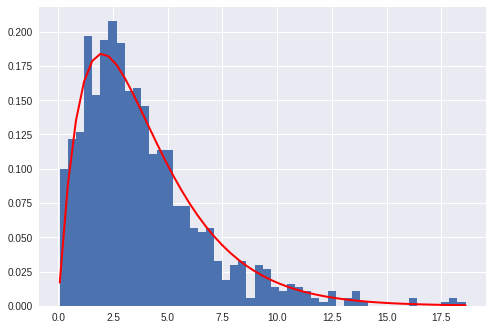

In [0]:
import matplotlib.pyplot as plt
import scipy.special as sps
import numpy as np

shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 1000)

count, bins, ignored = plt.hist(s, 50, density=True)

y = bins**(shape-1)*(np.exp(-bins/scale) / (sps.gamma(shape)*scale**shape))

plt.plot(bins, y, linewidth=2, color='r')
plt.show()

In [0]:
'''
A nearest neighbor learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import numpy as np
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t